In [ ]:
#1

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

mnist = fetch_openml("mnist_784")
mnist.data = mnist.data / 255.0
x_train = mnist.data[:60000]; x_test = mnist.data[60000:]
y_train = np.int16(mnist.target[:60000]); y_test = np.int16(mnist.target[60000:])

mlp1 = MLPClassifier(hidden_layer_sizes = (100), learning_rate_init = 0.001, batch_size = 512, max_iter = 300, solver = "adam", verbose = True)
mlp2 = MLPClassifier(hidden_layer_sizes = (200), learning_rate_init = 0.001, batch_size = 512, max_iter = 300, solver = "adam", verbose = True)
mlp1.fit(x_train, y_train)
mlp2.fit(x_train, y_train)

res1 = mlp1.predict(x_test)
res2 = mlp2.predict(x_test)

conf1 = np.zeros((10, 10), dtype = np.int16)
for i in range(len(res1)):
  conf1[res1[i]][y_test[i]] += 1
print(conf1)

conf2 = np.zeros((10, 10), dtype = np.int16)
for i in range(len(res2)):
  conf2[res2[i]][y_test[i]] += 1
print(conf2)

no_correct1 = 0
no_correct2 = 0

for i in range(10):
  no_correct1 += conf1[i][i]

for i in range(10):
  no_correct2 += conf2[i][i]

accuracy1 = no_correct1 / len(res1)
accuracy2 = no_correct2 / len(res2)
print("은닉 노드 개수가 100인 테스트 집합에 대한 정확률은", accuracy1 * 100, "%, 은닉 노드 개수가 200인 테스트 집합에 대한 정확률은", accuracy2 * 100, "%입니다.")

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Iteration 1, loss = 0.65158541
Iteration 2, loss = 0.26159333
Iteration 3, loss = 0.20639782
Iteration 4, loss = 0.17316205
Iteration 5, loss = 0.14917865
Iteration 6, loss = 0.12992042
Iteration 7, loss = 0.11602898
Iteration 8, loss = 0.10356082
Iteration 9, loss = 0.09399875
Iteration 10, loss = 0.08484199
Iteration 11, loss = 0.07767802
Iteration 12, loss = 0.07106494
Iteration 13, loss = 0.06534759
Iteration 14, loss = 0.06093861
Iteration 15, loss = 0.05543733
Iteration 16, loss = 0.05198415
Iteration 17, loss = 0.04753879
Iteration 18, loss = 0.04364132
Iteration 19, loss = 0.04141596
Iteration 20, loss = 0.03765000
Iteration 21, loss = 0.03590931
Iteration 22, loss = 0.03249512
Iteration 23, loss = 0.03068144
Iteration 24, loss = 0.02891524
Iteration 25, loss = 0.02614917
Iteration 26, loss = 0.02432081
Iteration 27, loss = 0.02301670
Iteration 28, loss = 0.02114491
Iteration 29, loss = 0.02000274
Iteration 30, loss = 0.01903409
Iteration 31, loss = 0.01713774
Iteration 32, los

In [ ]:
#2

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, validation_curve
import numpy as np
import matplotlib.pyplot as plt
import time

mnist = fetch_openml("mnist_784")
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, train_size = 0.6)

start = time.time()
mlp = MLPClassifier(learning_rate_init = 0.001, batch_size = 320, max_iter = 300, solver = "sgd")
prange = range(50, 1001, 50)
train_score, test_score = validation_curve(mlp, x_train, y_train, param_name = "hidden_layer_sizes", param_range = prange, cv = 10, scoring = "accuracy", n_jobs = 4)
end = time.time()
print("하이퍼 매개변수 최적화에 걸린 시간은 ", end - start, "초입니다.")

train_mean = np.mean(train_score, axis = 1)
train_std = np.std(train_score, axis = 1)
test_mean = np.mean(test_score, axis = 1)
test_std = np.std(test_score, axis = 1)

plt.plot(prange, train_mean, label = "Train score", color = "r")
plt.plot(prange, test_mean, label = "Train score", color = "b")
plt.fill_between(prange, train_mean - train_std, train_mean + train_std, alpha = 0.2, color = "r")
plt.fill_between(prange, test_mean - test_std, test_mean + test_std, alpha = 0.2, color = "b")  
plt.legend(loc = "best")
plt.title("Validation Curve with MLP")
plt.xlabel("Number of hidden nodes"); plt.ylabel("Accuracy")
plt.ylim(0.9, 1.01)
plt.grid(axis = "both")
plt.show()

best_number_nodes = prange[np.argmax(test_mean)]
print("\n최적의 은닉층의 노드 개수는", best_number_nodes, "개입니다.\n")

mlp_test = MLPClassifier(hidden_layer_sizes = (best_number_nodes), learning_rate_init = 0.001, batch_size = 32, max_iter = 300, solver = "sgd")
mlp_test.fit(x_train, y_train)

res = mlp_test.predict(x_test)

conf = np.zeros((10, 10))
for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1
print(conf)

no_correct = 0
for i in range(10):
  no_correct += conf[i][i]
accuracy = no_correct / len(res)
print("테스트 집합에 대한 정확률은", accuracy * 100, "%입니다.")

In [ ]:
#3 - 1

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

mnist = fetch_openml("mnist_784")
mnist.data = mnist.data / 255.0
x_train = mnist.data[:60000]; x_test = mnist.data[60000:]
y_train = np.int16(mnist.target[:60000]); y_test = np.int16(mnist.target[60000:])

mlp1 = MLPClassifier(hidden_layer_sizes = (100, 100), learning_rate_init = 0.001, batch_size = 512, max_iter = 300, solver = "adam", verbose = True)

mlp1.fit(x_train, y_train)

res1 = mlp1.predict(x_test)

conf1 = np.zeros((10, 10), dtype = np.int16)
for i in range(len(res1)):
  conf1[res1[i]][y_test[i]] += 1
print(conf1)

no_correct1 = 0

for i in range(10):
  no_correct1 += conf1[i][i]

accuracy1 = no_correct1 / len(res1)
print("은닉층의 개수가 2인 테스트 집합에 대한 정확률은", accuracy1 * 100, "%입니다.")

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Iteration 1, loss = 0.61353958
Iteration 2, loss = 0.22000627
Iteration 3, loss = 0.16588687
Iteration 4, loss = 0.13209309
Iteration 5, loss = 0.10907324
Iteration 6, loss = 0.09304884
Iteration 7, loss = 0.08063478
Iteration 8, loss = 0.07083901
Iteration 9, loss = 0.06387945
Iteration 10, loss = 0.05477603
Iteration 11, loss = 0.04933829
Iteration 12, loss = 0.04369608
Iteration 13, loss = 0.03957842
Iteration 14, loss = 0.03564333
Iteration 15, loss = 0.03193120
Iteration 16, loss = 0.02877531
Iteration 17, loss = 0.02558440
Iteration 18, loss = 0.02324746
Iteration 19, loss = 0.02024305
Iteration 20, loss = 0.02099158
Iteration 21, loss = 0.01532020
Iteration 22, loss = 0.01508102
Iteration 23, loss = 0.01295036
Iteration 24, loss = 0.01099729
Iteration 25, loss = 0.00990338
Iteration 26, loss = 0.00897553
Iteration 27, loss = 0.00707696
Iteration 28, loss = 0.00705053
Iteration 29, loss = 0.00646600
Iteration 30, loss = 0.00614274
Iteration 31, loss = 0.00503092
Iteration 32, los

In [ ]:
#3 - 2

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

mnist = fetch_openml("mnist_784")
mnist.data = mnist.data / 255.0
x_train = mnist.data[:60000]; x_test = mnist.data[60000:]
y_train = np.int16(mnist.target[:60000]); y_test = np.int16(mnist.target[60000:])

mlp2 = MLPClassifier(hidden_layer_sizes = (100, 100, 100), learning_rate_init = 0.001, batch_size = 512, max_iter = 300, solver = "adam", verbose = True)

mlp2.fit(x_train, y_train)

res2 = mlp2.predict(x_test)

conf2 = np.zeros((10, 10), dtype = np.int16)
for i in range(len(res2)):
  conf2[res2[i]][y_test[i]] += 1
print(conf2)

no_correct2 = 0

for i in range(10):
  no_correct2 += conf2[i][i]

accuracy2 = no_correct2 / len(res2)
print("은닉층의 개수가 3인 테스트 집합에 대한 정확률은", accuracy2 * 100, "%입니다.")

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Iteration 1, loss = 0.59225185
Iteration 2, loss = 0.19467624
Iteration 3, loss = 0.14027888
Iteration 4, loss = 0.11068586
Iteration 5, loss = 0.09129968
Iteration 6, loss = 0.07366715
Iteration 7, loss = 0.06421246
Iteration 8, loss = 0.05454568
Iteration 9, loss = 0.04749141
Iteration 10, loss = 0.03924730
Iteration 11, loss = 0.03459085
Iteration 12, loss = 0.03144487
Iteration 13, loss = 0.02427705
Iteration 14, loss = 0.02332847
Iteration 15, loss = 0.01917610
Iteration 16, loss = 0.01687039
Iteration 17, loss = 0.01343173
Iteration 18, loss = 0.01267622
Iteration 19, loss = 0.00985395
Iteration 20, loss = 0.00789865
Iteration 21, loss = 0.00766963
Iteration 22, loss = 0.00944764
Iteration 23, loss = 0.00857654
Iteration 24, loss = 0.01165752
Iteration 25, loss = 0.01476496
Iteration 26, loss = 0.00551320
Iteration 27, loss = 0.00623563
Iteration 28, loss = 0.00291360
Iteration 29, loss = 0.00163818
Iteration 30, loss = 0.00110826
Iteration 31, loss = 0.00084375
Iteration 32, los

In [ ]:
#3 - 3

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

mnist = fetch_openml("mnist_784")
mnist.data = mnist.data / 255.0
x_train = mnist.data[:60000]; x_test = mnist.data[60000:]
y_train = np.int16(mnist.target[:60000]); y_test = np.int16(mnist.target[60000:])

mlp3 = MLPClassifier(hidden_layer_sizes = (100, 100, 100, 100), learning_rate_init = 0.001, batch_size = 512, max_iter = 300, solver = "adam", verbose = True)

mlp3.fit(x_train, y_train)

res3 = mlp3.predict(x_test)

conf3 = np.zeros((10, 10), dtype = np.int16)
for i in range(len(res3)):
  conf3[res3[i]][y_test[i]] += 1
print(conf3)

no_correct3 = 0

for i in range(10):
  no_correct3 += conf3[i][i]

accuracy3 = no_correct3 / len(res3)
print("은닉층의 개수가 4인 테스트 집합에 대한 정확률은", accuracy3 * 100, "%입니다.")

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Iteration 1, loss = 0.57934942
Iteration 2, loss = 0.18298840
Iteration 3, loss = 0.13043530
Iteration 4, loss = 0.10366947
Iteration 5, loss = 0.08418539
Iteration 6, loss = 0.07053934
Iteration 7, loss = 0.06080931
Iteration 8, loss = 0.05070317
Iteration 9, loss = 0.04630039
Iteration 10, loss = 0.03924613
Iteration 11, loss = 0.03284559
Iteration 12, loss = 0.02975327
Iteration 13, loss = 0.02901728
Iteration 14, loss = 0.02295192
Iteration 15, loss = 0.01677948
Iteration 16, loss = 0.01431781
Iteration 17, loss = 0.01452020
Iteration 18, loss = 0.01374201
Iteration 19, loss = 0.00978820
Iteration 20, loss = 0.01048343
Iteration 21, loss = 0.01101918
Iteration 22, loss = 0.01103857
Iteration 23, loss = 0.02028437
Iteration 24, loss = 0.01089465
Iteration 25, loss = 0.00407876
Iteration 26, loss = 0.00239885
Iteration 27, loss = 0.00107933
Iteration 28, loss = 0.00084162
Iteration 29, loss = 0.00073710
Iteration 30, loss = 0.00047089
Iteration 31, loss = 0.00036613
Iteration 32, los

In [ ]:
#3 - 4

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

mnist = fetch_openml("mnist_784")
mnist.data = mnist.data / 255.0
x_train = mnist.data[:60000]; x_test = mnist.data[60000:]
y_train = np.int16(mnist.target[:60000]); y_test = np.int16(mnist.target[60000:])

mlp4 = MLPClassifier(hidden_layer_sizes = (100, 100, 100, 100, 100), learning_rate_init = 0.001, batch_size = 512, max_iter = 300, solver = "adam", verbose = True)

mlp4.fit(x_train, y_train)

res4 = mlp4.predict(x_test)

conf4 = np.zeros((10, 10), dtype = np.int16)
for i in range(len(res4)):
  conf4[res4[i]][y_test[i]] += 1
print(conf4)

no_correct4 = 0

for i in range(10):
  no_correct4 += conf4[i][i]

accuracy4 = no_correct4 / len(res4)
print("은닉층의 개수가 5인 테스트 집합에 대한 정확률은", accuracy1 * 100, "%입니다.")

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Iteration 1, loss = 0.61726321
Iteration 2, loss = 0.17983623
Iteration 3, loss = 0.13045584
Iteration 4, loss = 0.10488653
Iteration 5, loss = 0.08906015
Iteration 6, loss = 0.07180710
Iteration 7, loss = 0.06172521
Iteration 8, loss = 0.05428929
Iteration 9, loss = 0.04580168
Iteration 10, loss = 0.04015238
Iteration 11, loss = 0.03180661
Iteration 12, loss = 0.02861958
Iteration 13, loss = 0.02627869
Iteration 14, loss = 0.02518695
Iteration 15, loss = 0.01868962
Iteration 16, loss = 0.02078892
Iteration 17, loss = 0.01484250
Iteration 18, loss = 0.01211053
Iteration 19, loss = 0.01484427
Iteration 20, loss = 0.01349886
Iteration 21, loss = 0.00803061
Iteration 22, loss = 0.01112599
Iteration 23, loss = 0.01186089
Iteration 24, loss = 0.00972269
Iteration 25, loss = 0.01602532
Iteration 26, loss = 0.01130283
Iteration 27, loss = 0.00976269
Iteration 28, loss = 0.00658582
Iteration 29, loss = 0.01156369
Iteration 30, loss = 0.00804190
Iteration 31, loss = 0.00652221
Iteration 32, los

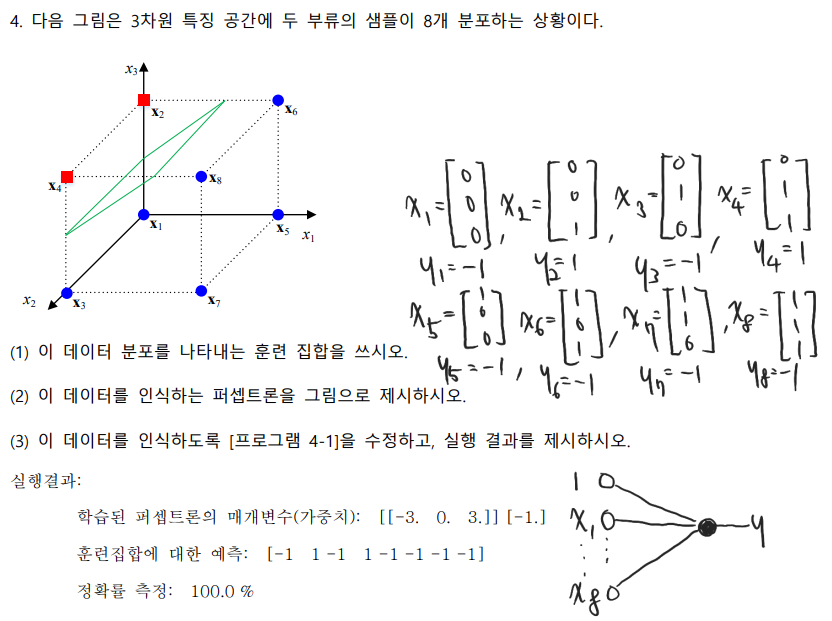

In [ ]:
#4 - 3

from sklearn.linear_model import Perceptron

X = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
y = [1, -1, 1, -1, 1, 1, 1, 1]

p = Perceptron()
p.fit(X, y)

print("학습된 퍼셉트론의 매개변수: ", p.coef_, p.intercept_)
print("훈련집합에 대한 예측: ", p.predict(X))
print("정확률 측정: ", p.score(X, y) * 100, "%")

학습된 퍼셉트론의 매개변수:  [[ 3.  0. -3.]] [1.]
훈련집합에 대한 예측:  [ 1 -1  1 -1  1  1  1  1]
정확률 측정:  100.0 %
